![enter image description here](https://img.shields.io/badge/Author-Nestor_Batista_Díaz-yellow)

# <p style="text-align: center;" >TAREA RESOLVER LABERINTO </p><p style="text-align: center;" >(EN ABANICO)</p>

## Importamos las librerias

In [5]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from collections import deque
import numpy as np

## Definimos el laberinto

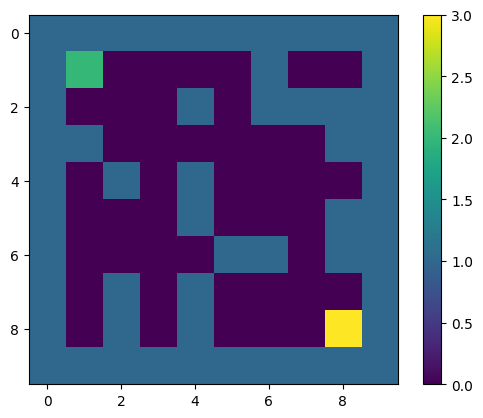

In [18]:


def generar_laberinto(filas, columnas, inicio, fin):
    # matriz de zeros
    laberinto = np.zeros((filas, columnas), dtype=int)

    # muros exteriores
    laberinto[0, :] = 1  
    laberinto[-1, :] = 1  
    laberinto[:, 0] = 1  
    laberinto[:, -1] = 1

    # Marcamos el inicio y el final
    laberinto[inicio[0], inicio[1]] = 2
    laberinto[fin[0], fin[1]] = 3

    # Rellenamos el laberinto con obstáculos (1) de manera aleatoria
    for i in range(1, filas-1):
        for j in range(1, columnas-1):
            if (i, j) != inicio and (i, j) != fin:
                laberinto[i, j] = np.random.choice([0, 1], p=[0.7, 0.3])


    return laberinto

# Definimos las dimensiones del laberinto y las posiciones de inicio y fin
filas, columnas = 10, 10
fin = (8, 8)
inicio = (1, 1)

# Generamos el laberinto
laberinto = generar_laberinto(filas, columnas, inicio, fin)

# Mostramos el laberinto
def visualize(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

visualize(laberinto)

## Resolvemos el laberinto

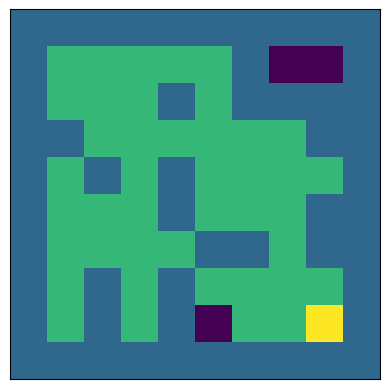

¡Laberinto resuelto!


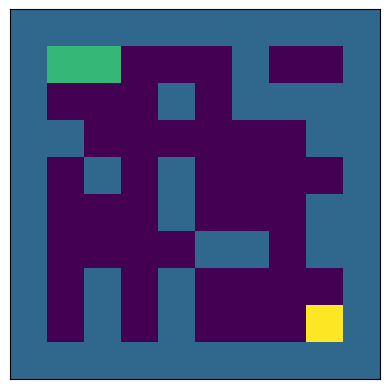

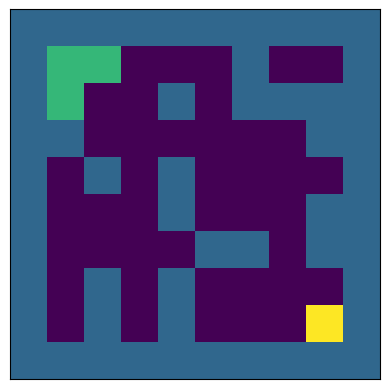

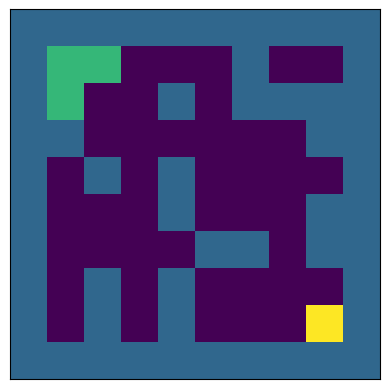

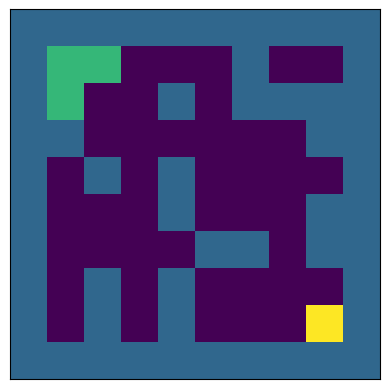

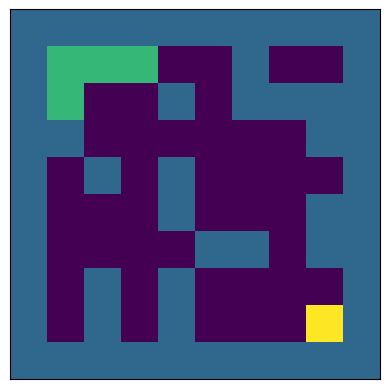

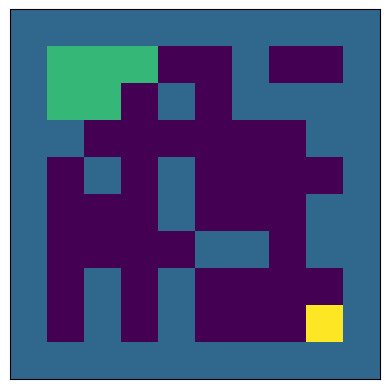

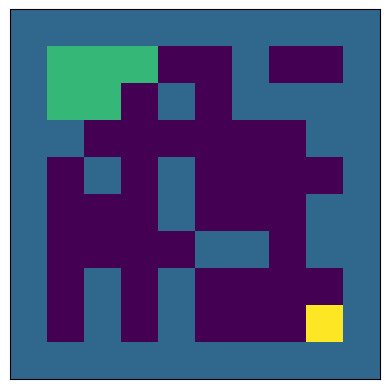

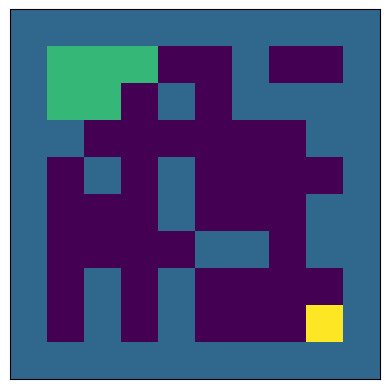

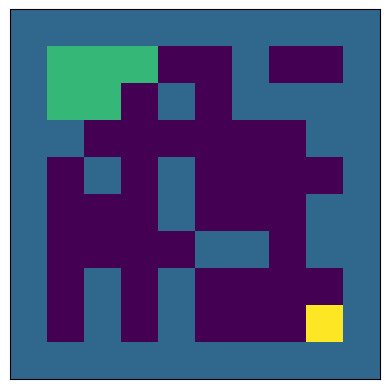

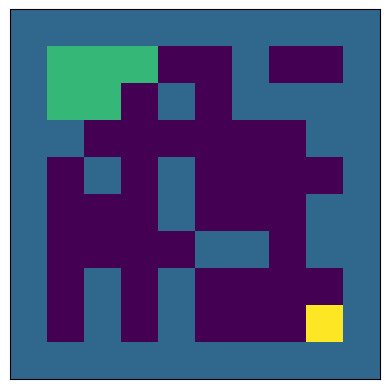

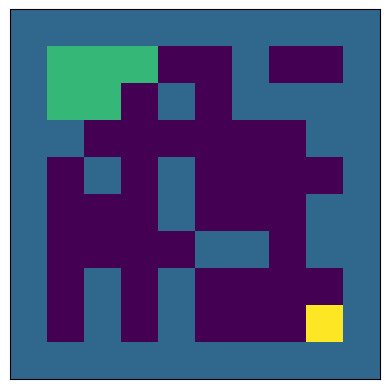

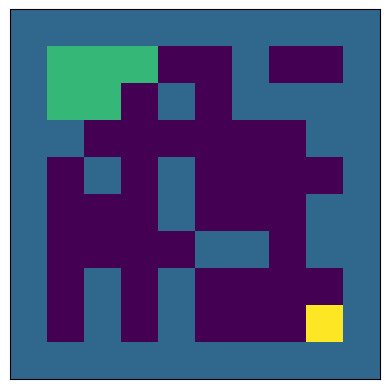

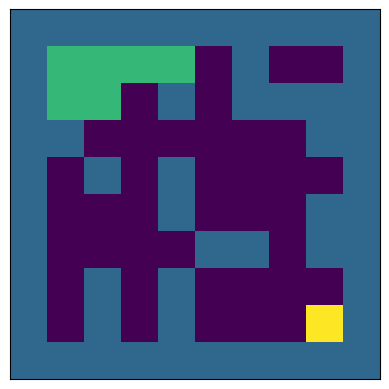

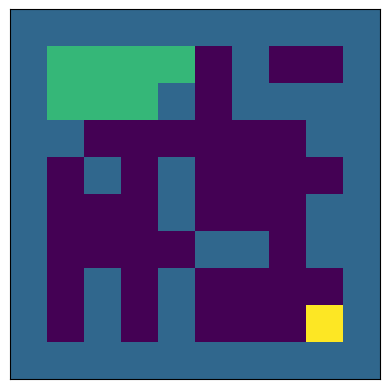

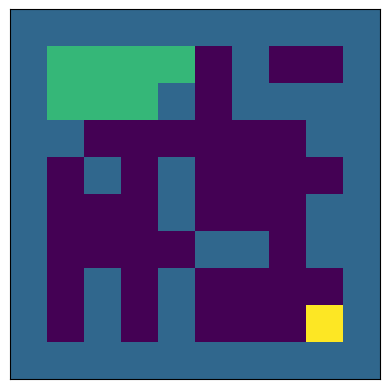

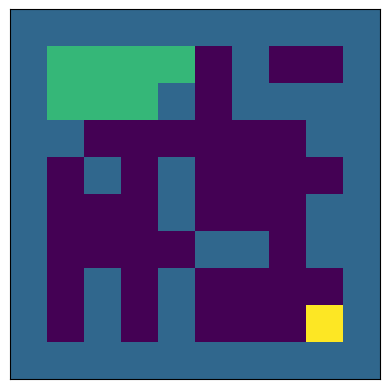

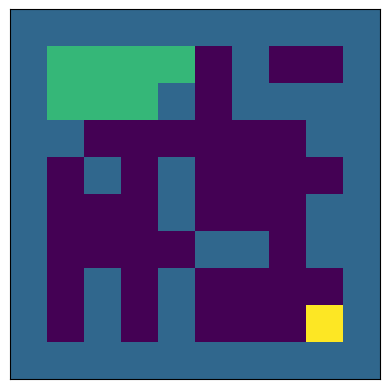

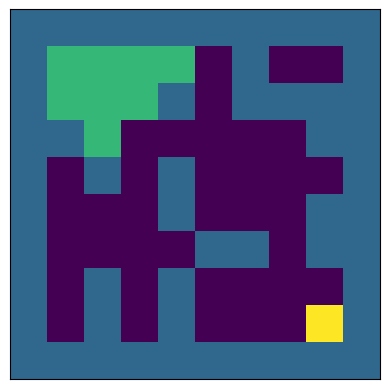

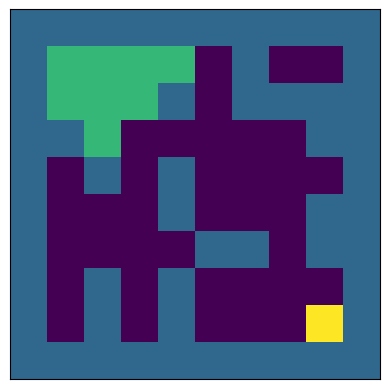

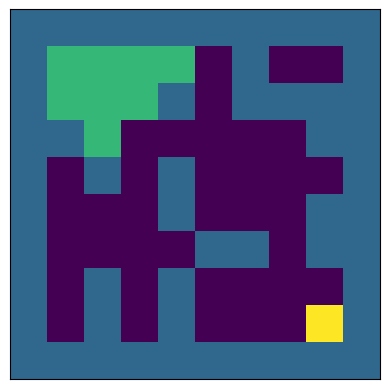

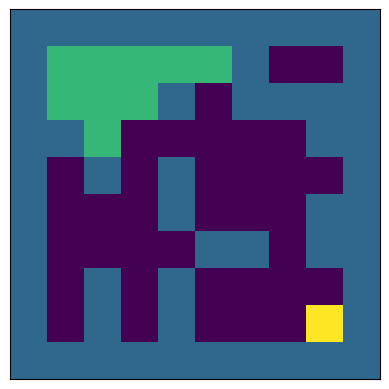

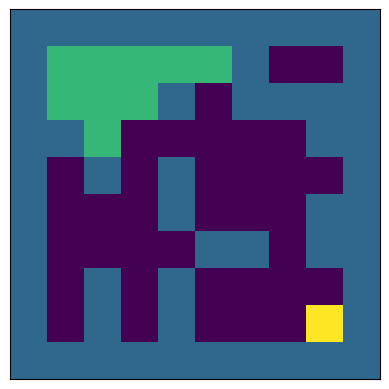

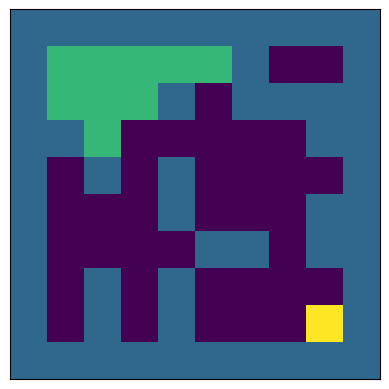

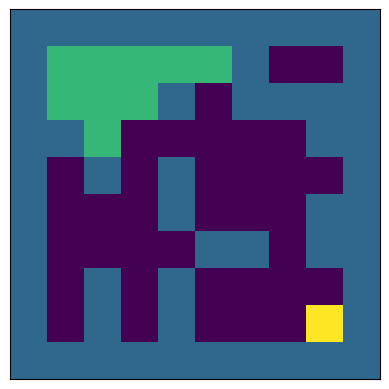

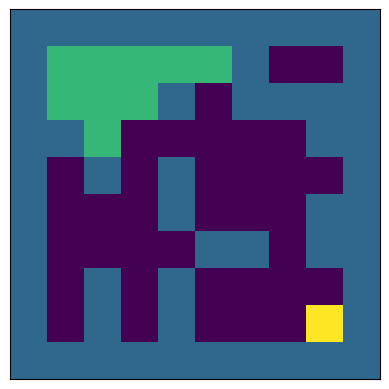

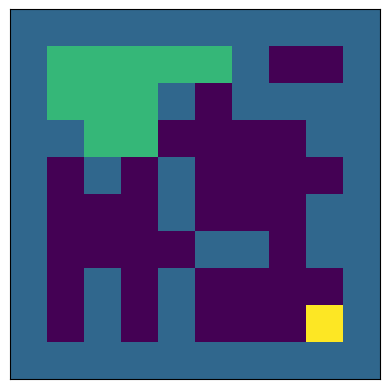

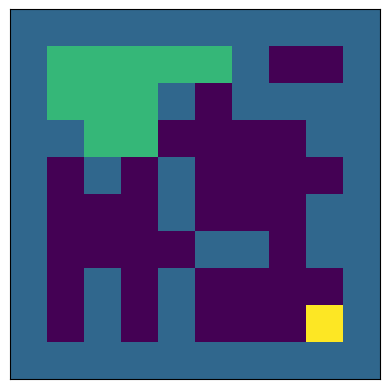

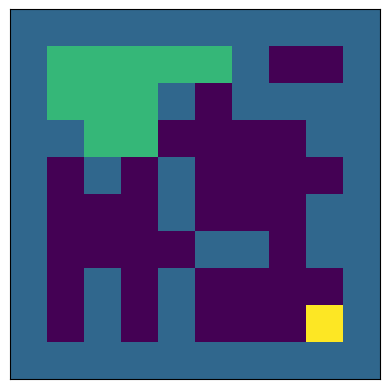

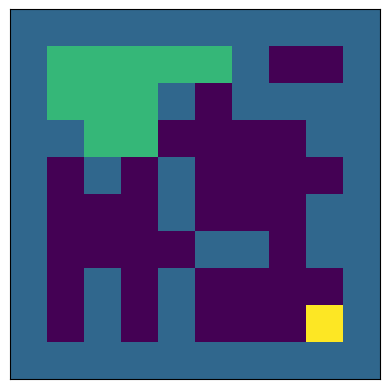

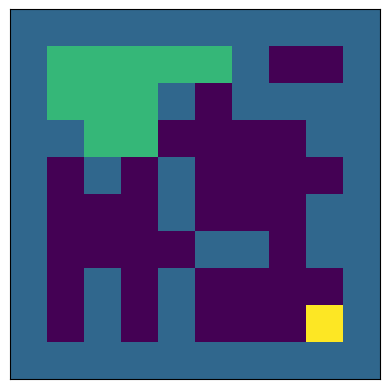

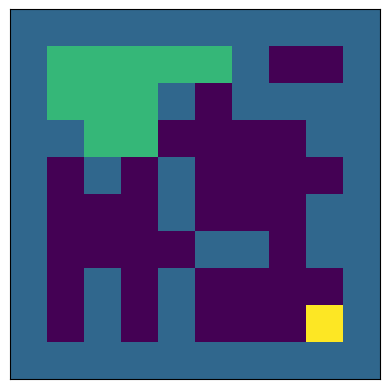

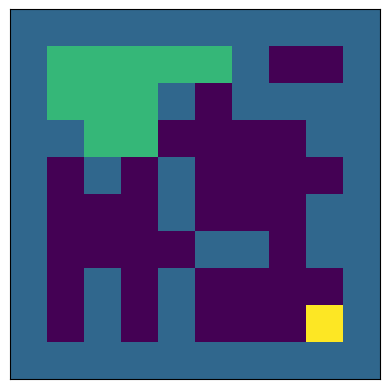

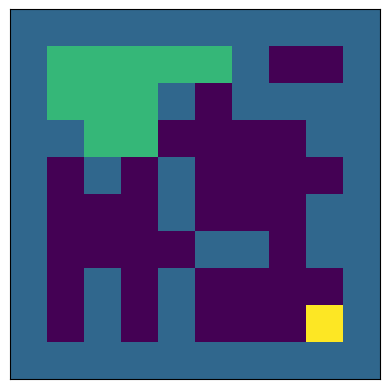

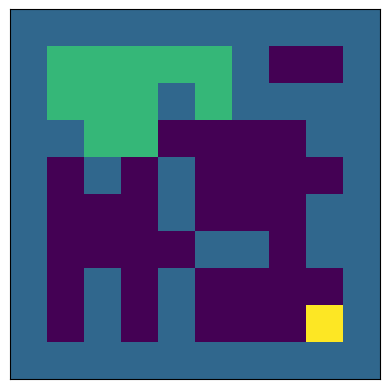

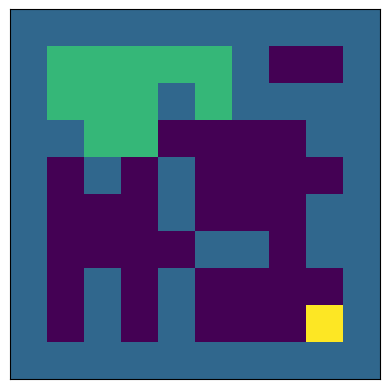

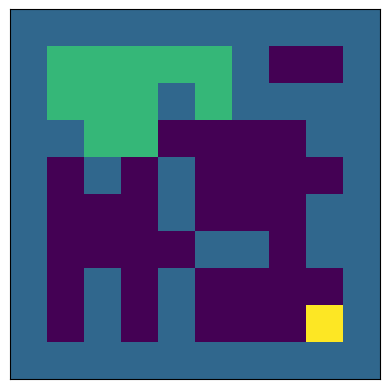

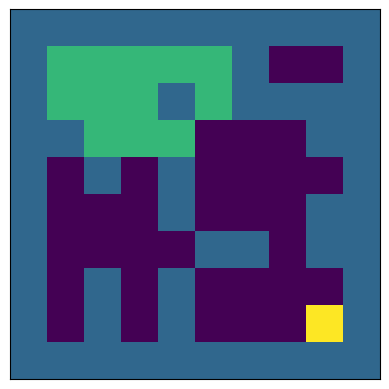

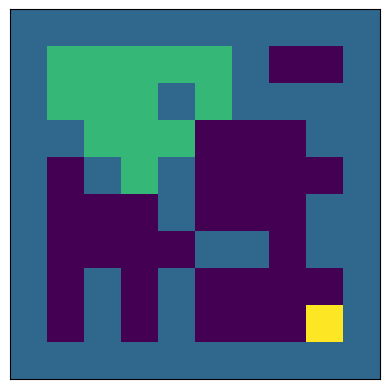

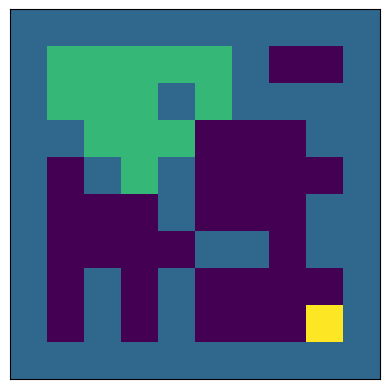

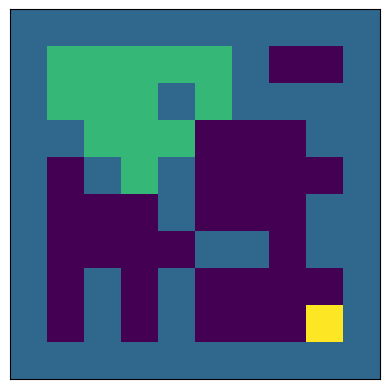

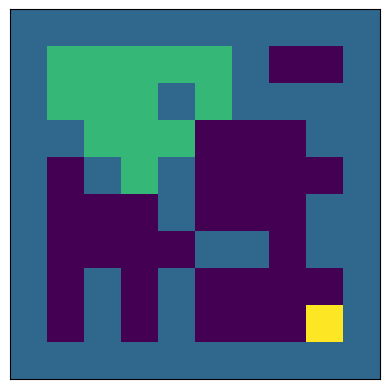

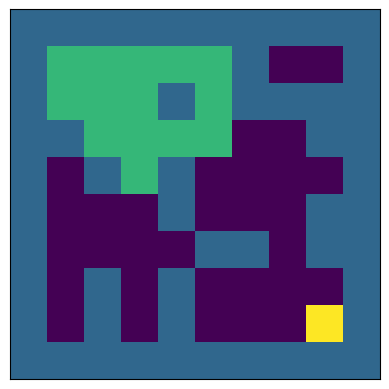

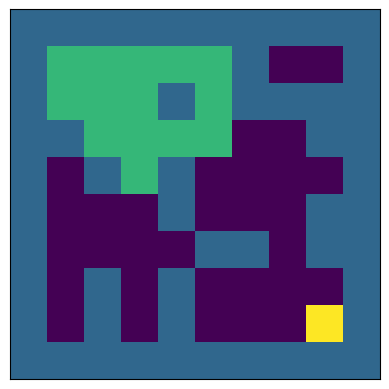

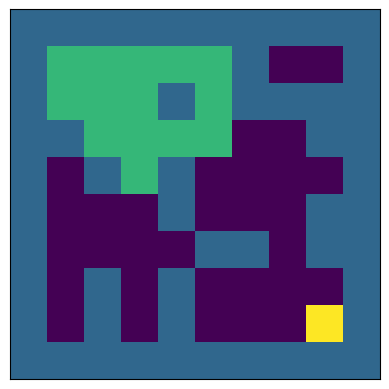

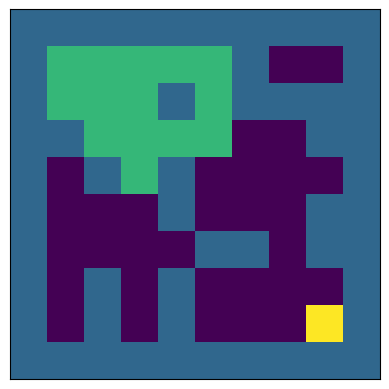

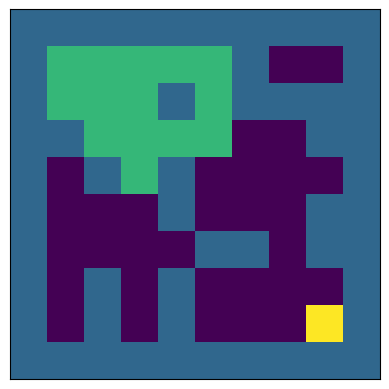

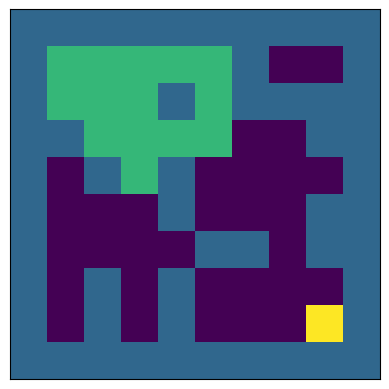

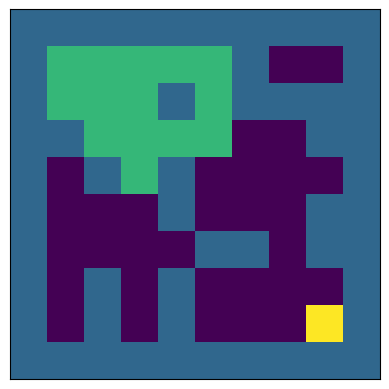

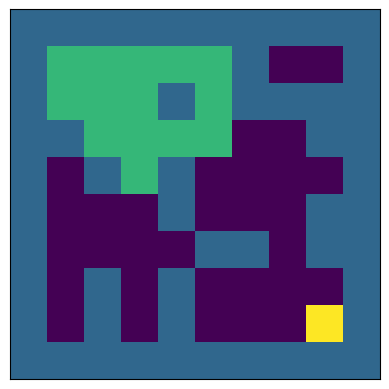

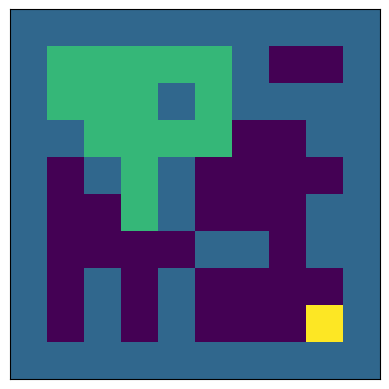

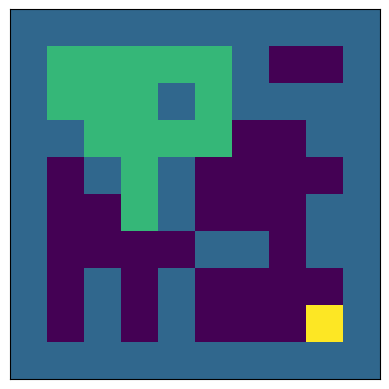

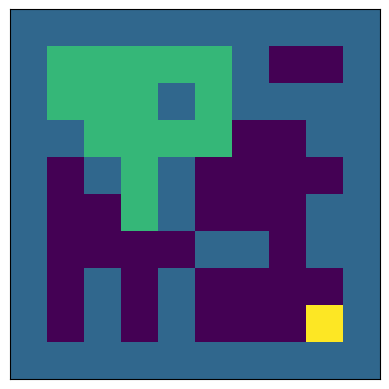

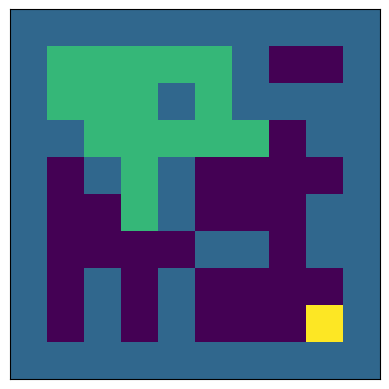

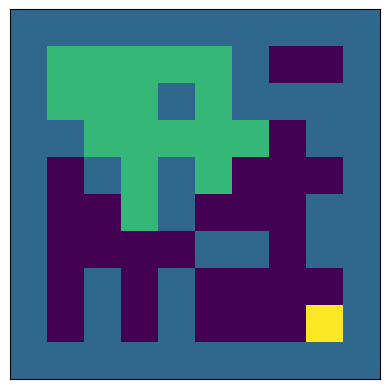

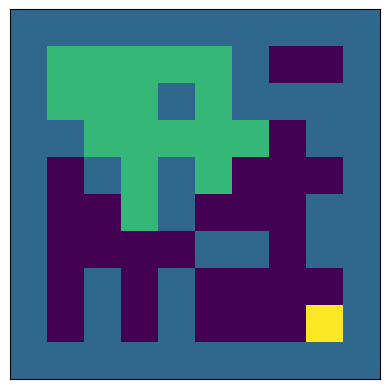

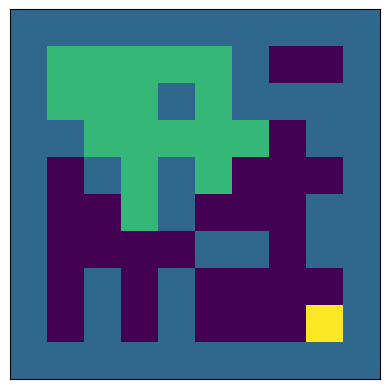

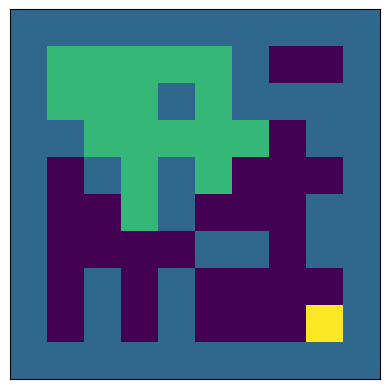

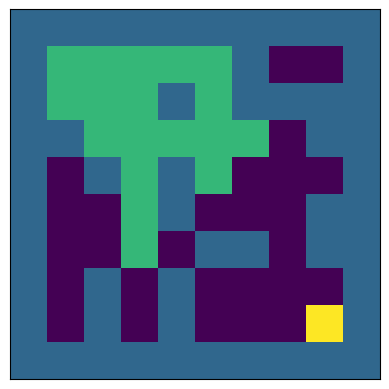

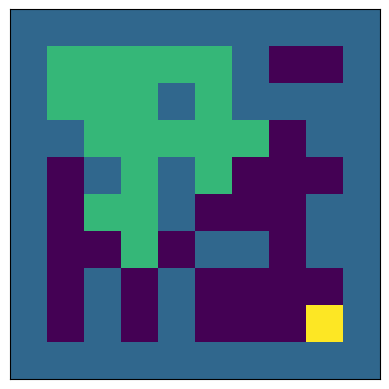

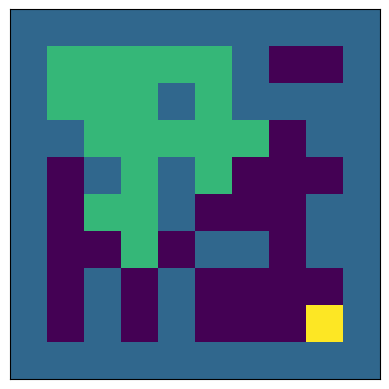

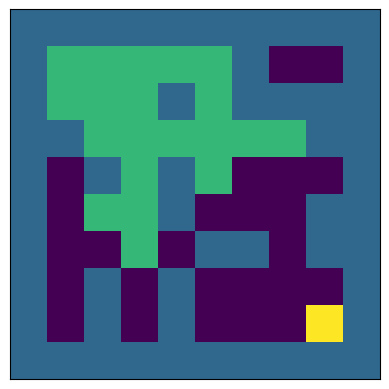

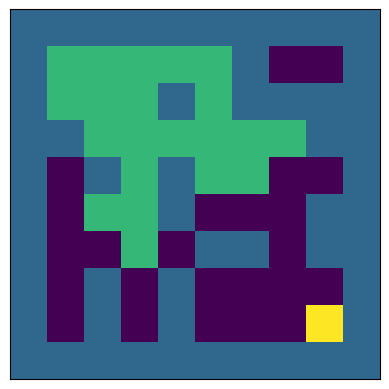

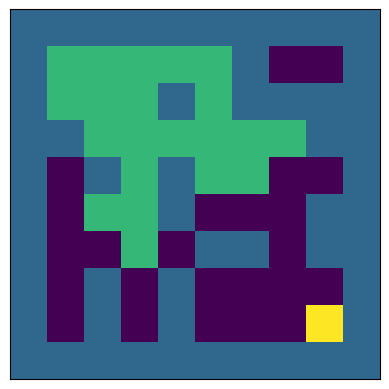

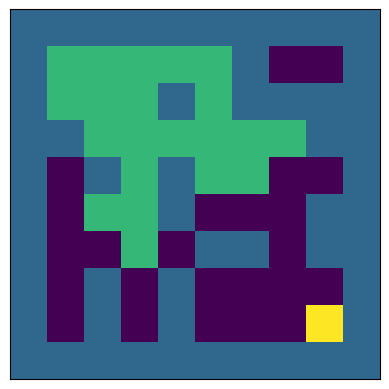

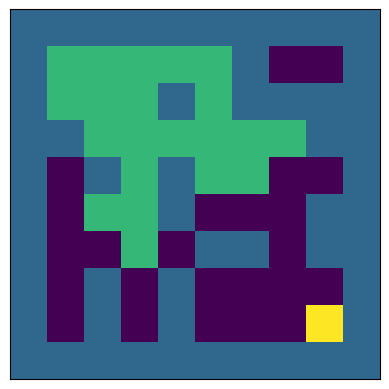

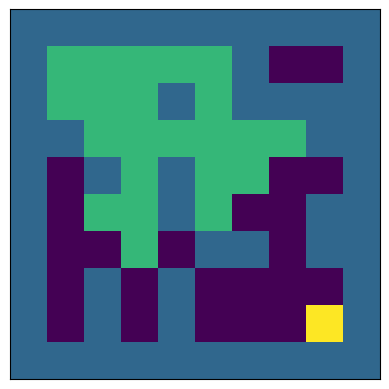

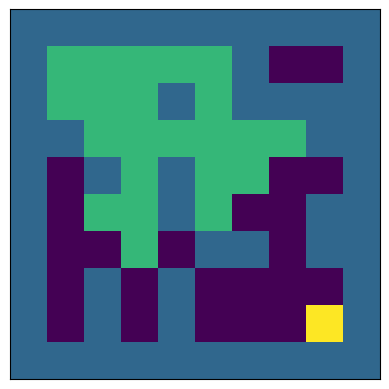

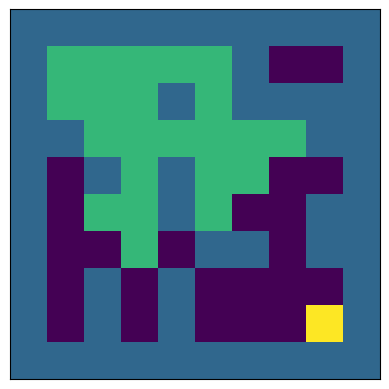

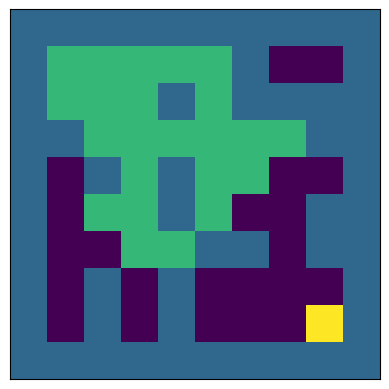

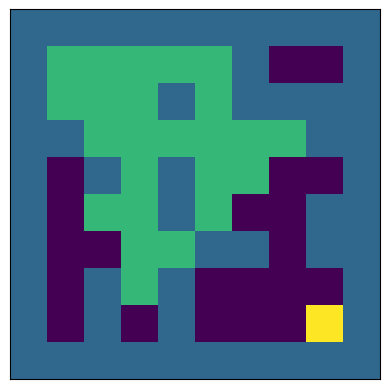

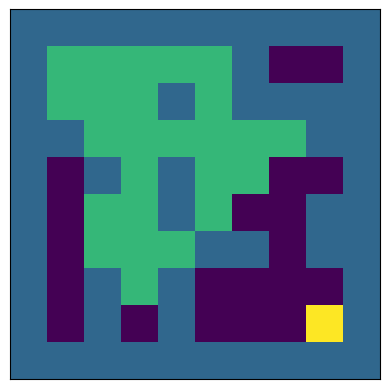

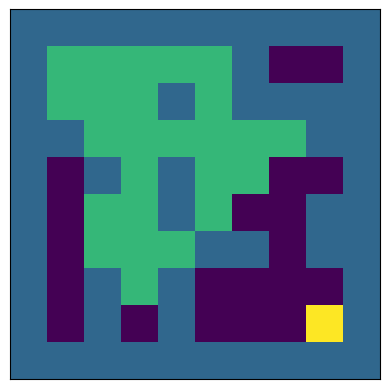

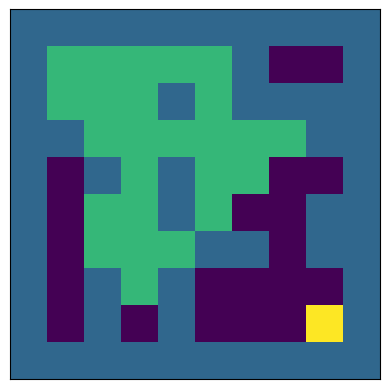

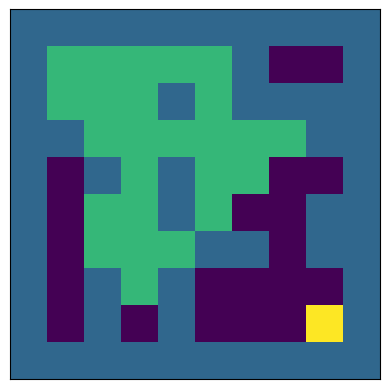

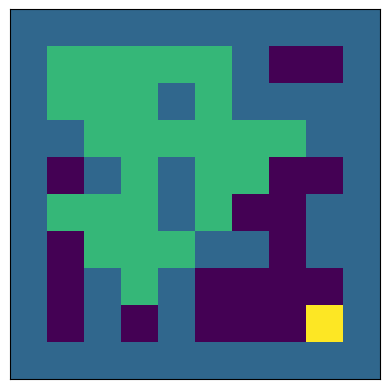

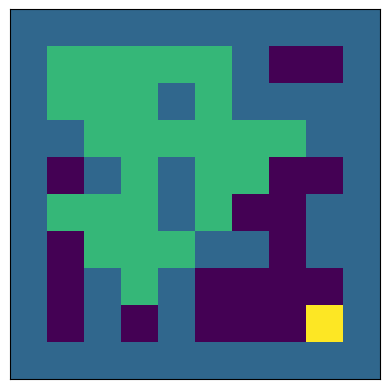

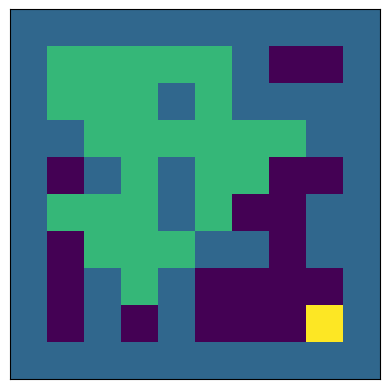

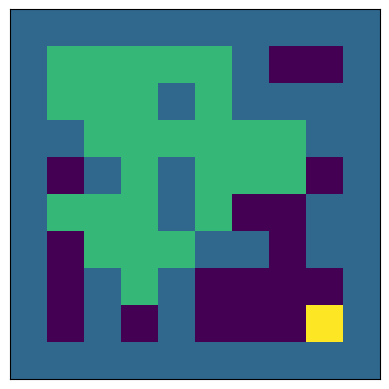

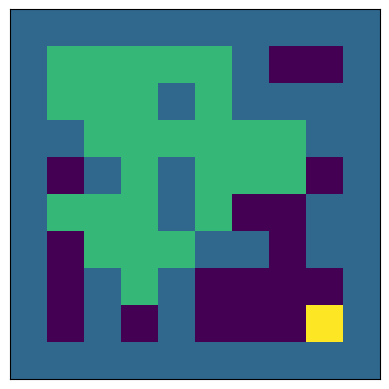

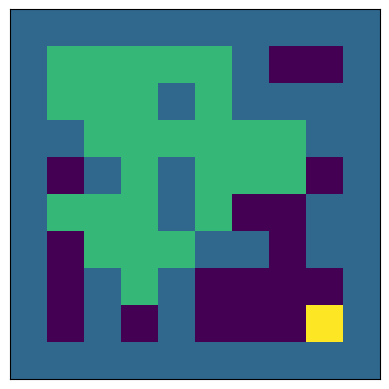

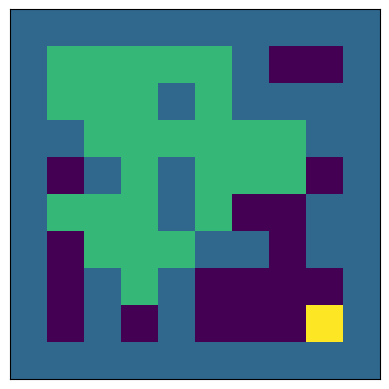

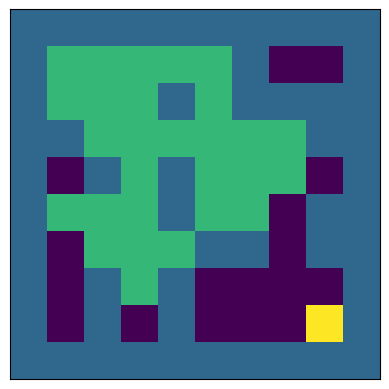

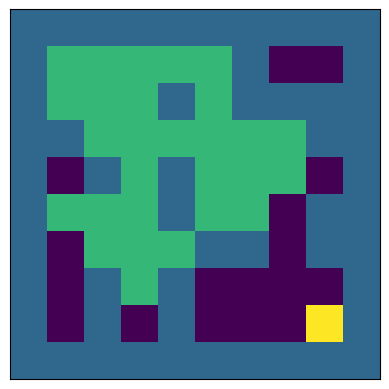

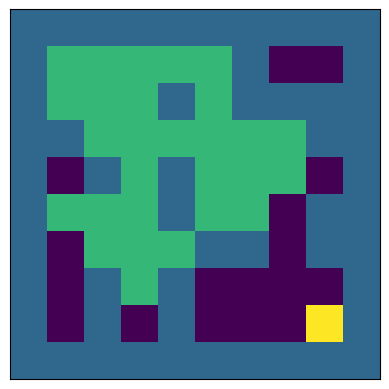

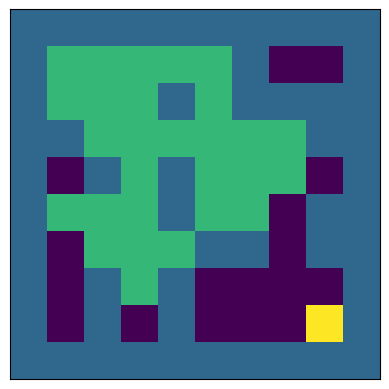

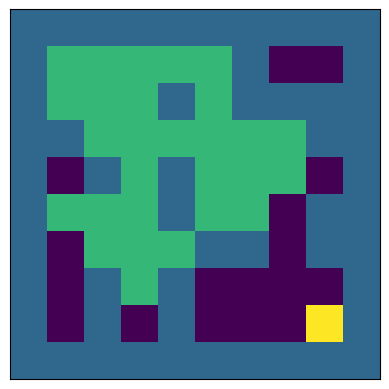

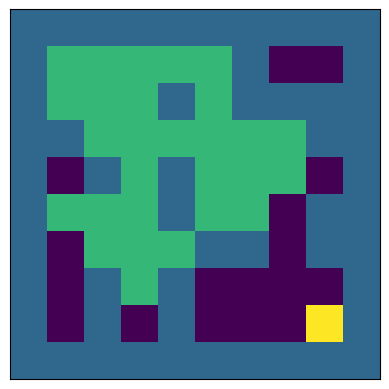

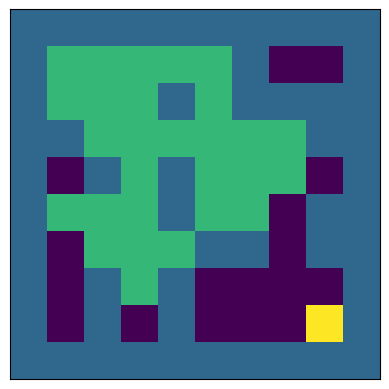

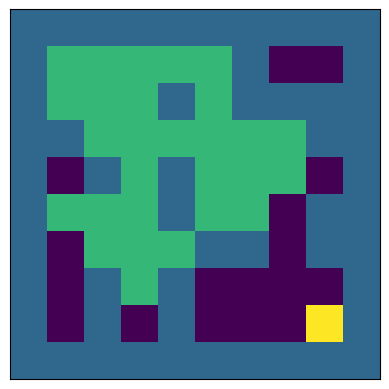

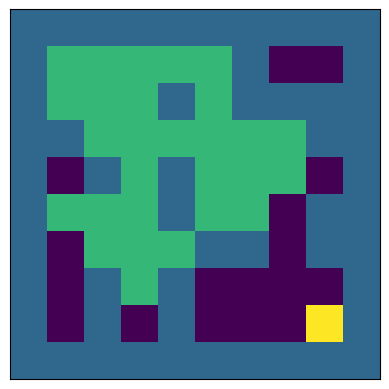

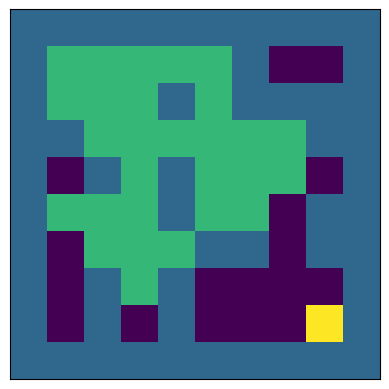

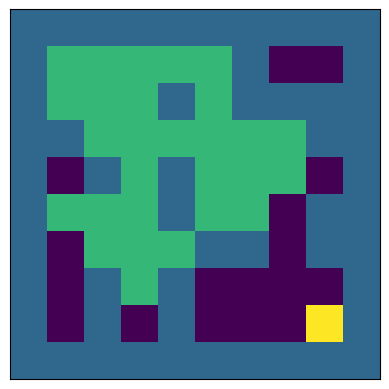

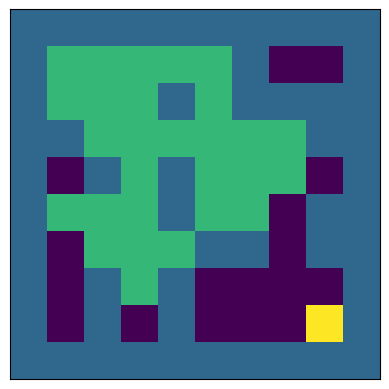

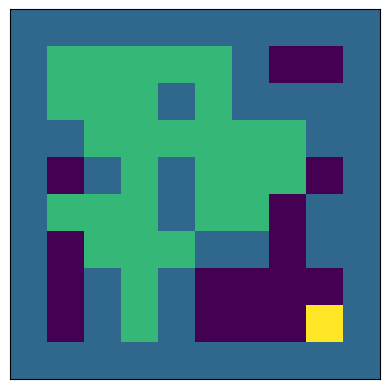

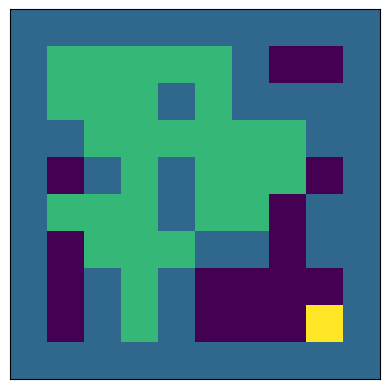

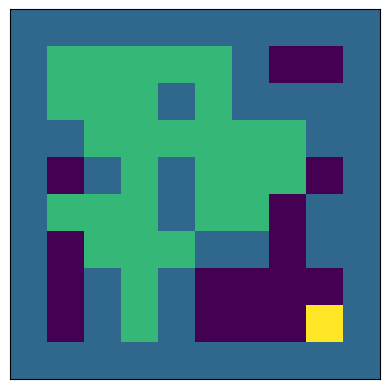

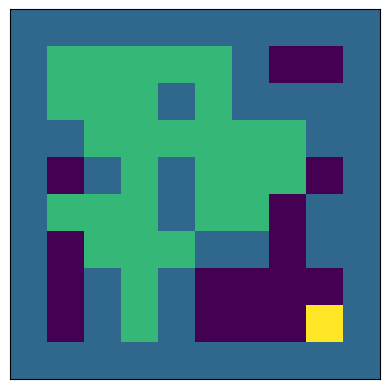

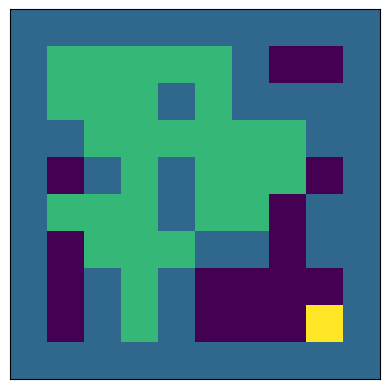

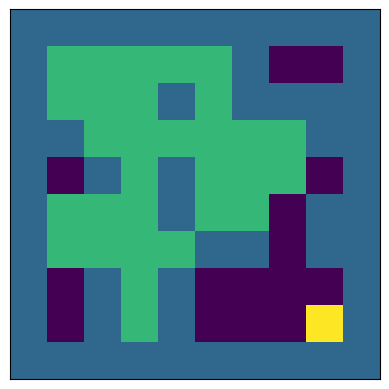

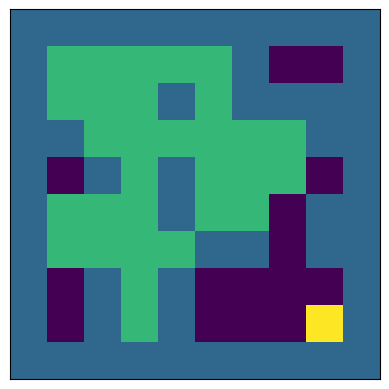

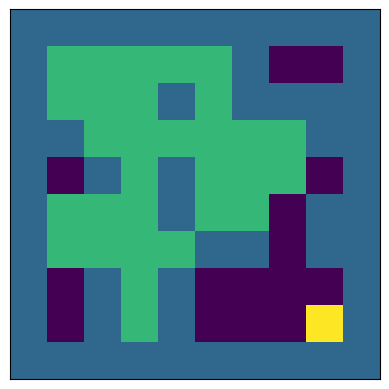

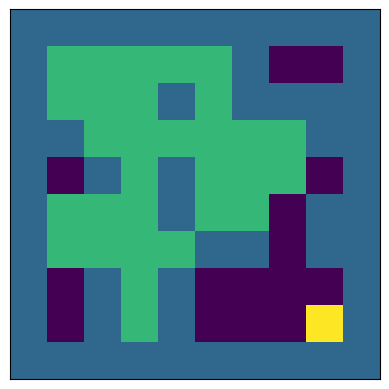

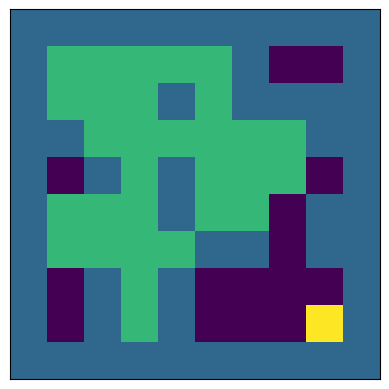

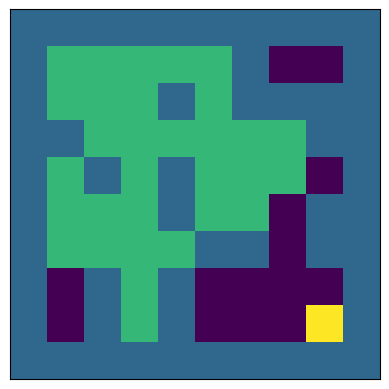

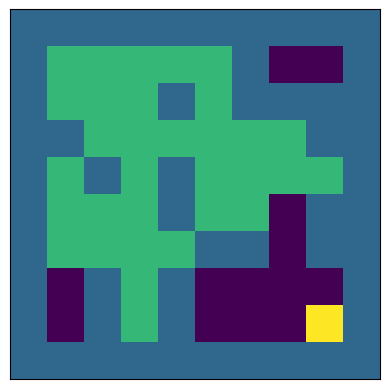

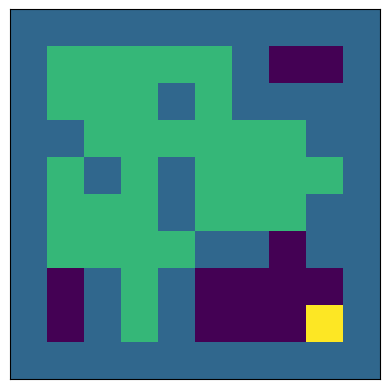

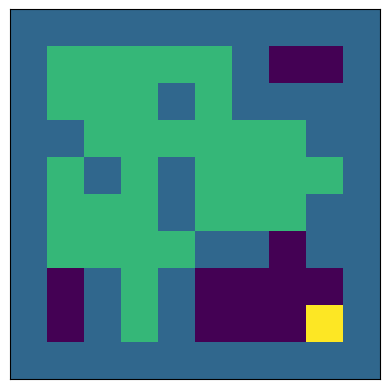

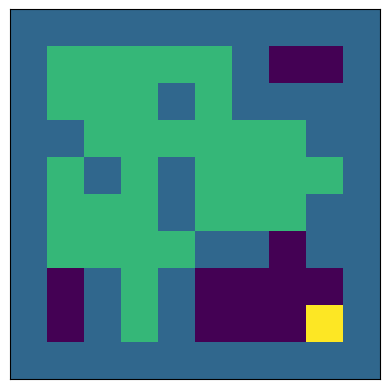

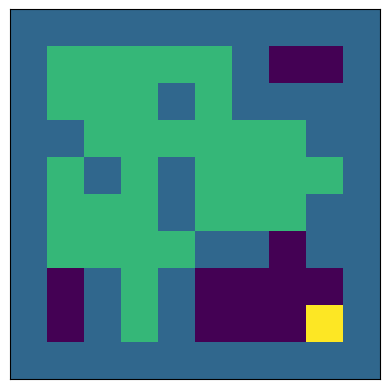

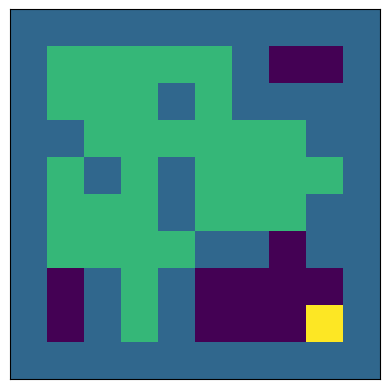

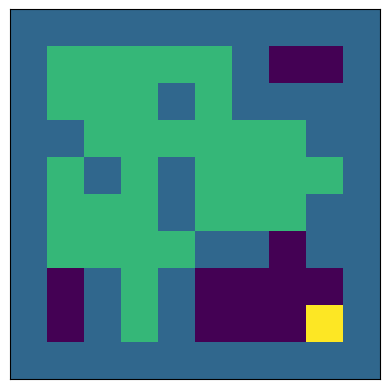

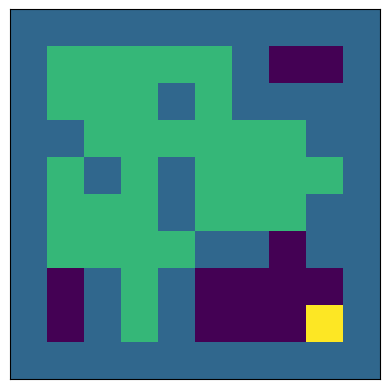

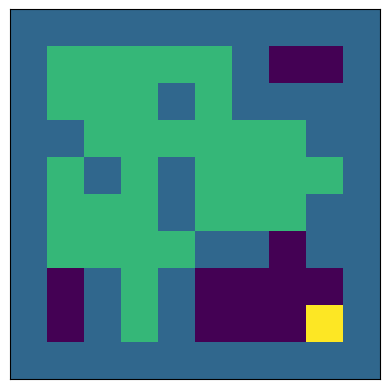

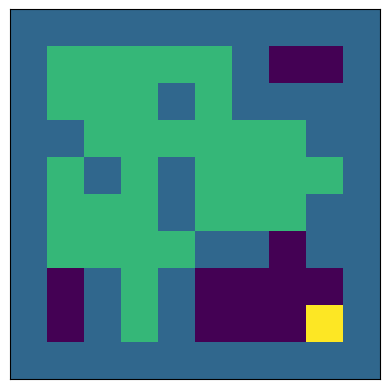

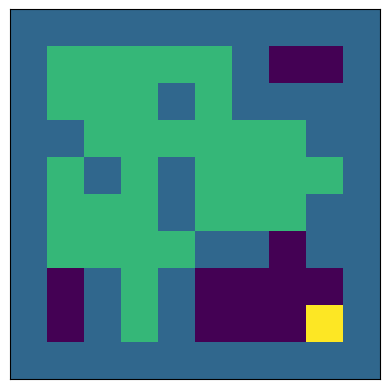

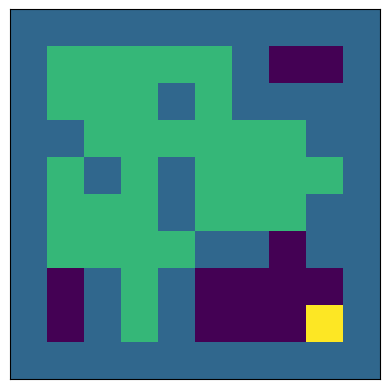

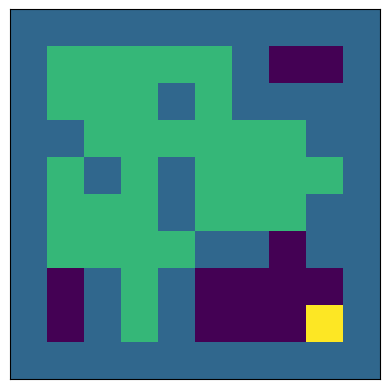

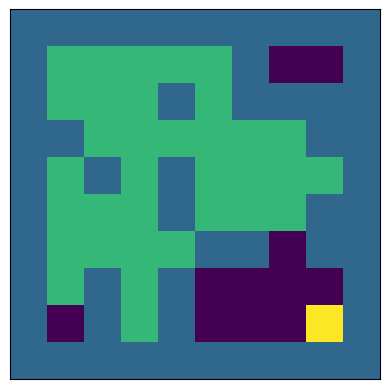

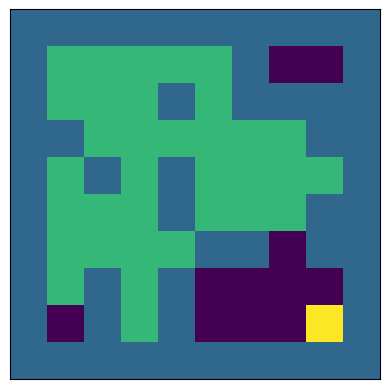

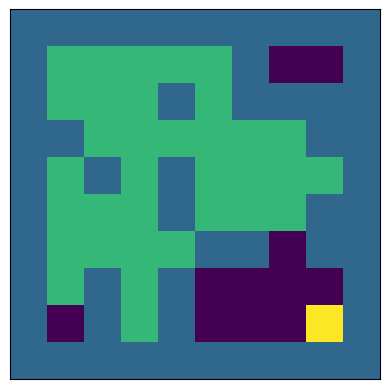

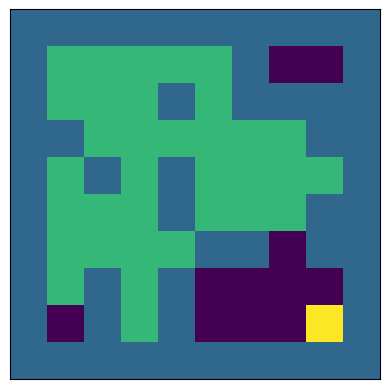

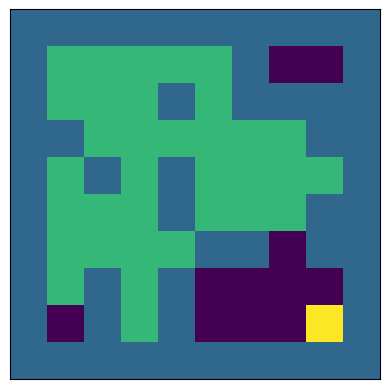

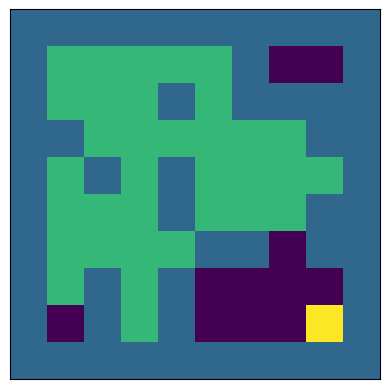

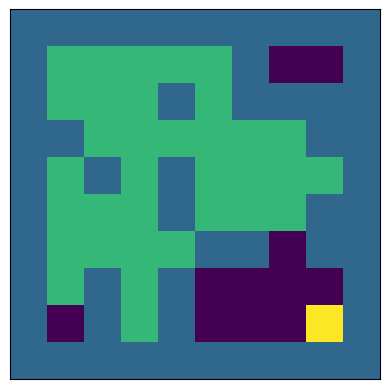

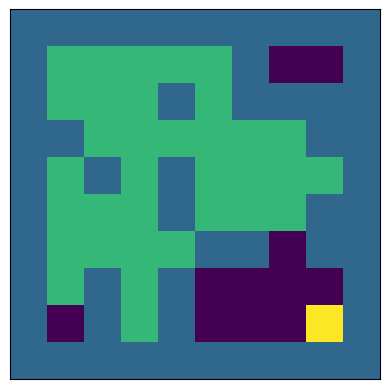

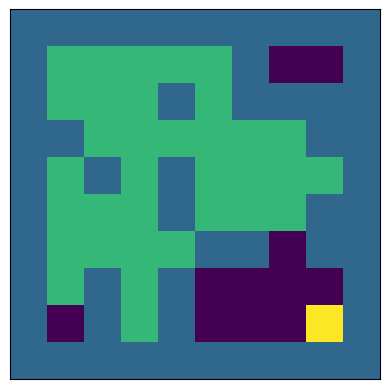

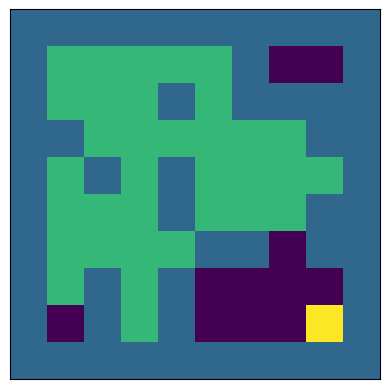

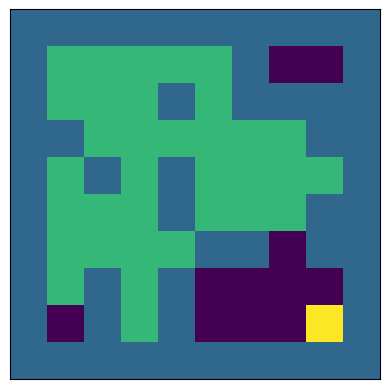

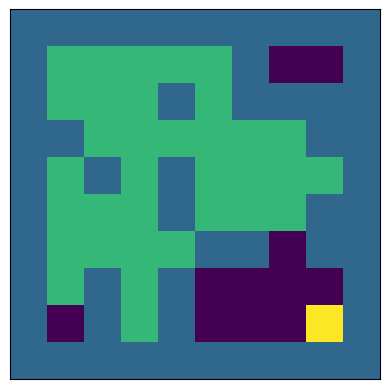

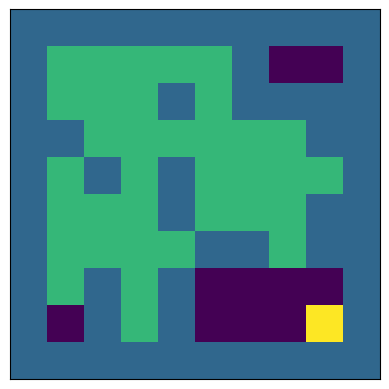

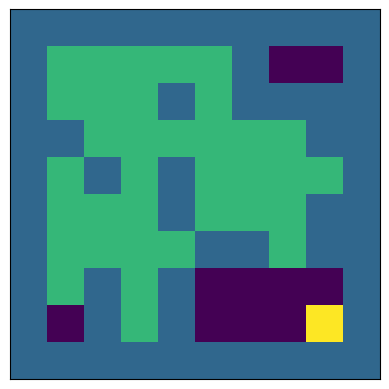

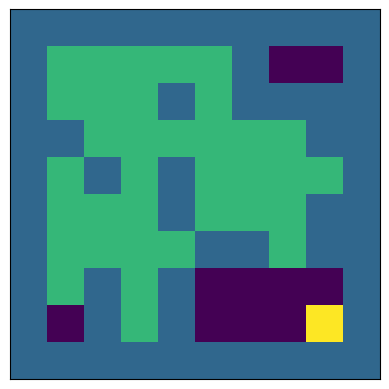

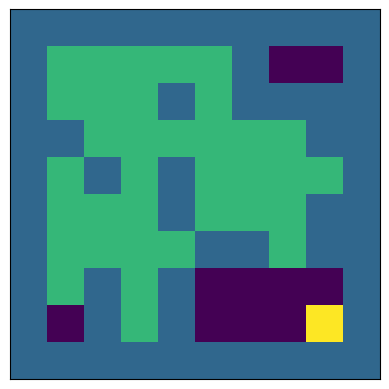

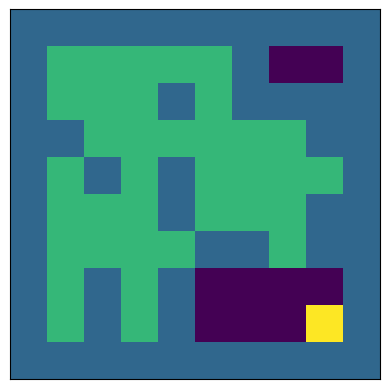

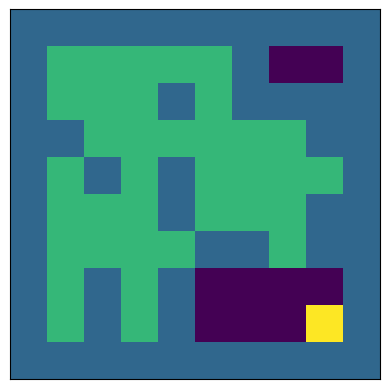

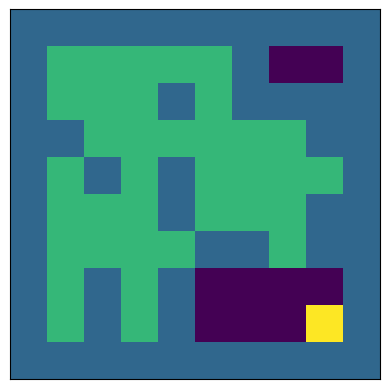

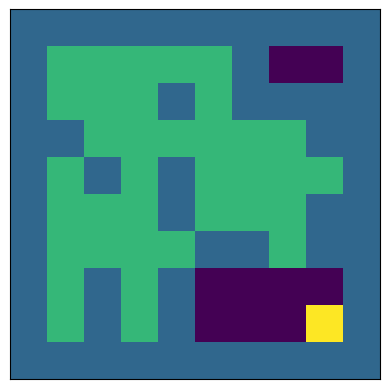

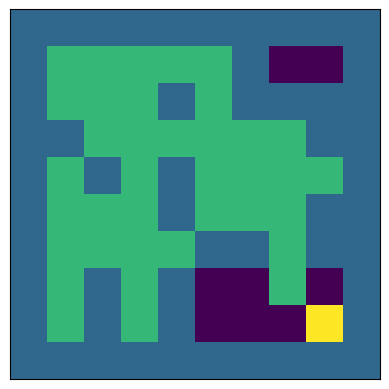

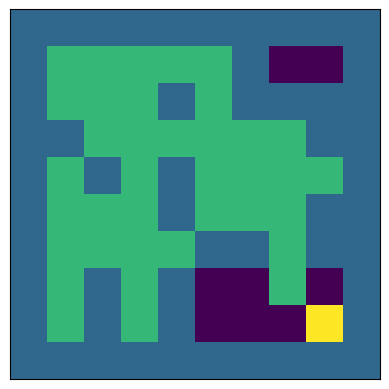

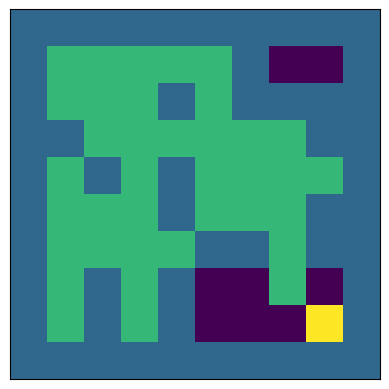

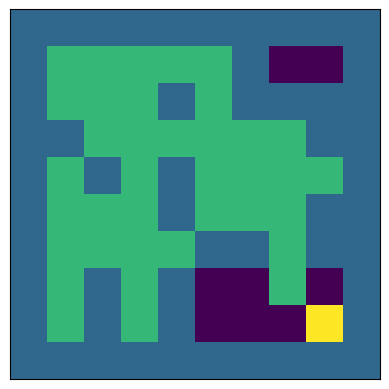

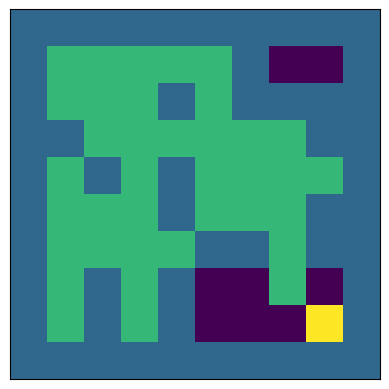

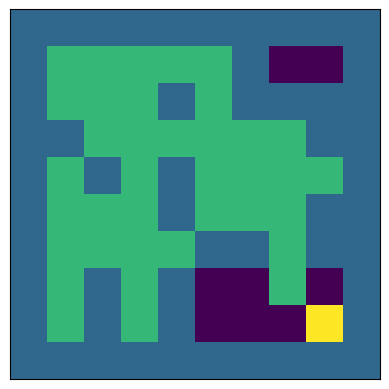

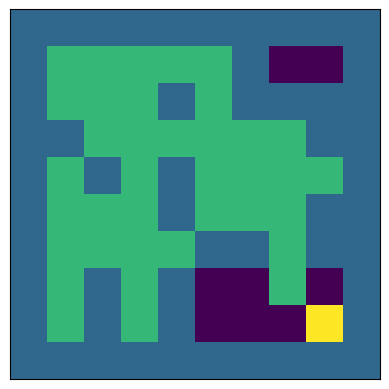

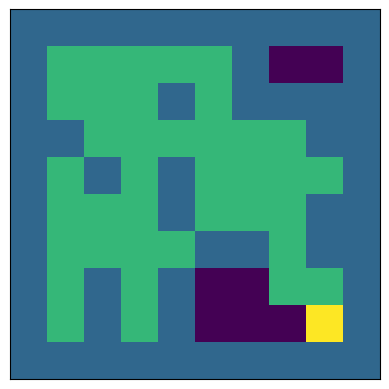

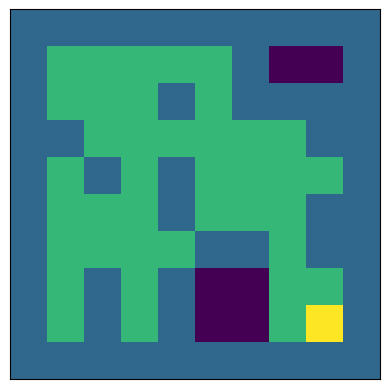

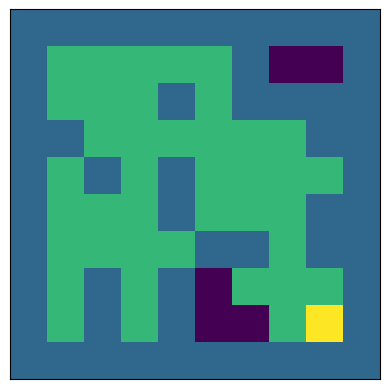

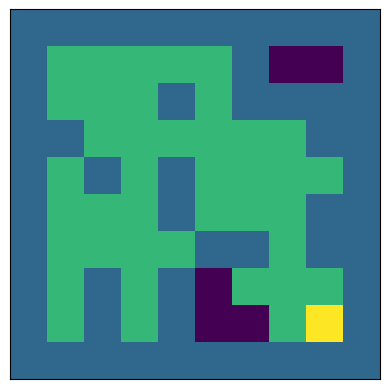

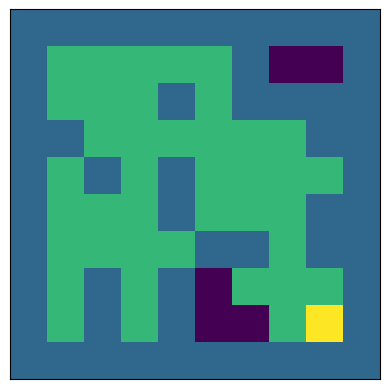

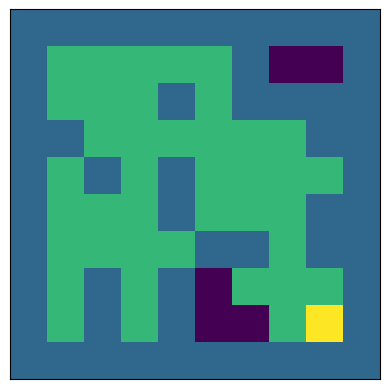

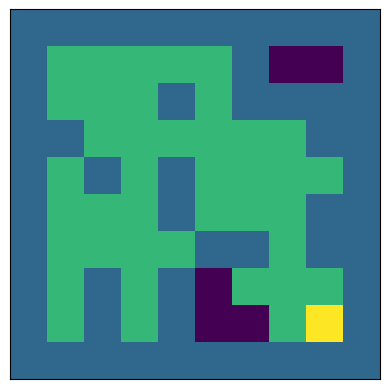

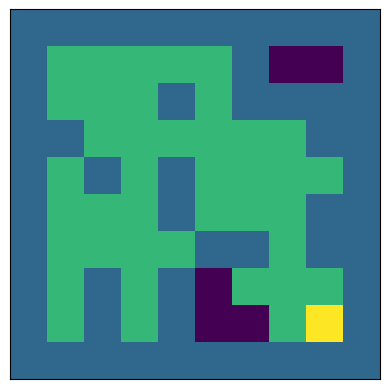

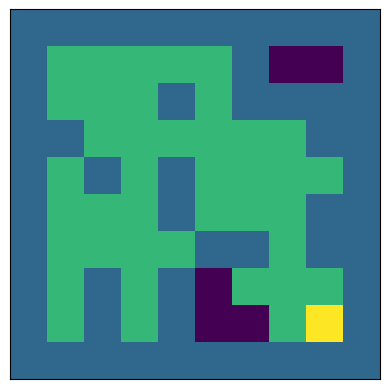

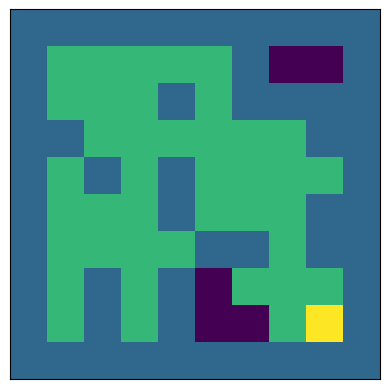

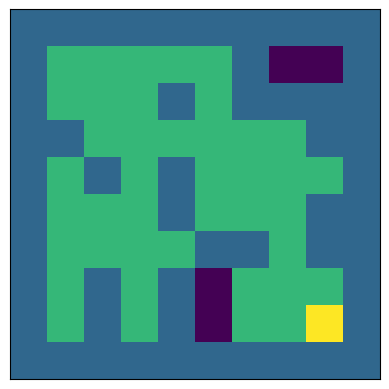

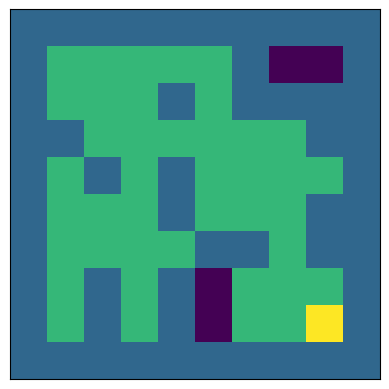

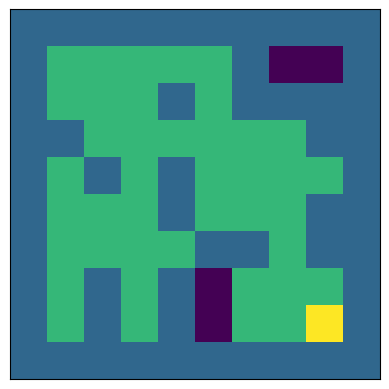

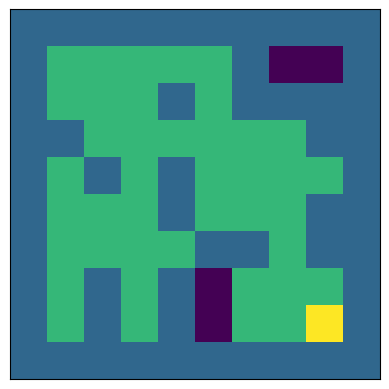

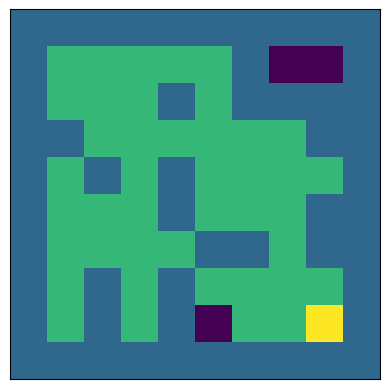

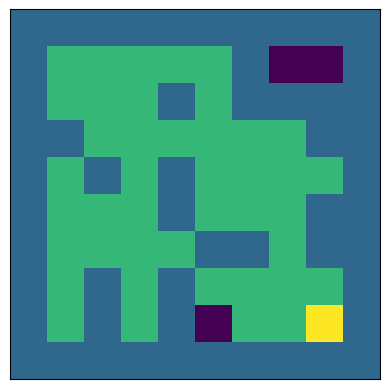

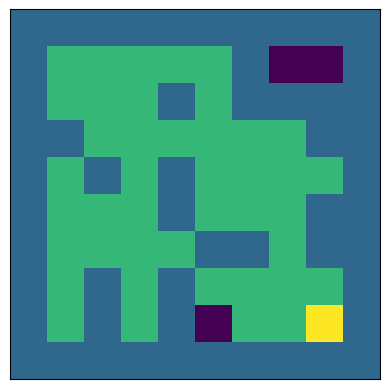

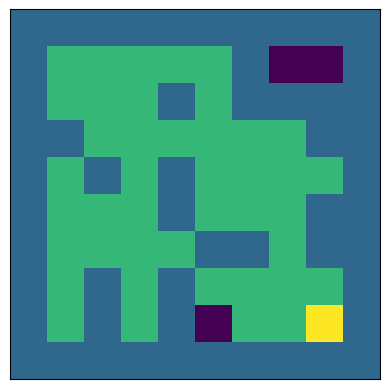

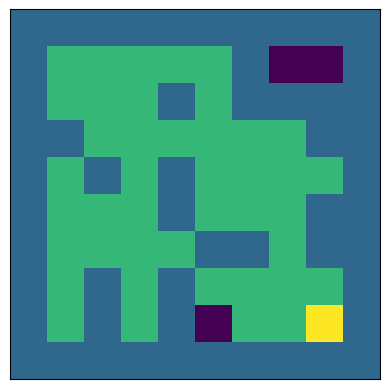

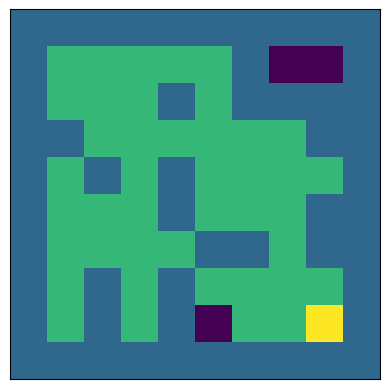

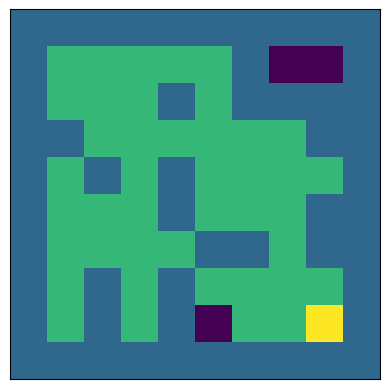

In [19]:
# Funcion que define los colores de los elementos del laberinto
def plot_maze(maze):
    plt.imshow(maze, cmap='viridis', interpolation='nearest')
    plt.xticks([]), plt.yticks([])

# Funcion que muestra el laberinto por fotogramas
def show_maze(maze):
    plt.figure()
    plot_maze(maze)
    clear_output(wait=True)
    display(plt.gcf())

# Funcion que resuelve el laberinto pasandole 
# la matriz del laberinto y el inicio como parametros
def solve_maze(maze, start):
    # Definimos la cola y donde empieza
    queue = deque([start])

    # Lista de puntos visitados
    visited = set()

    # Variable que indica si tiene solución o no el laberinto
    result = False;

    while queue:
        # quitamos el ultimo valor de la cola y lo almacenamos en la variable que define la pocición actual
        current_position = queue.popleft()

        # añadimos la posición actual a sitios visitados
        visited.add(current_position)

        # definimos la fila y la columna de la posición actual
        row, col = current_position

        # Direcciones en las que nos podemos mover
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        # nos movemos en todas las direcciones posibles
        for x, y in directions:
            new_row, new_col = row + x, col + y
            
            # si es un camino o el final que lo almacene en la cola
            if (maze[new_row][new_col] == 0 or maze[new_row][new_col] == 3):
                queue.append((new_row, new_col))

                # si no es el final que defina la pocición actual como un 2 para ver visualmente como se mueve
                if(maze[new_row][new_col] != 3):
                    maze[new_row, new_col] = 2
            # mostramos el laberinto actual
            show_maze(maze)

        # Si encontramos la salida marcamos como laberinto resuelto y salimos del bucle
        if maze[current_position[0]][current_position[1]] == 3:
            result = True
            break
        
    if(result):
        show_maze(maze)
        print("¡Laberinto resuelto!")
    else:
        show_maze(maze)
        print("No hay salida")
    

solve_maze(laberinto, inicio)